In [1]:
import uproot
import awkward as ak #The events object is an awkward array
## Plotting.
import matplotlib.pyplot as plt

# Hists
import hist
from hist import Hist

# NanoEvents
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# Processors
#import coffea.processor as processor

#File to read
fname='signal_files/WPHADWMLEPjj_EWK.root'

#Define the events
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema,
).events()

In [3]:
#List the branches of the root file 
ak.fields(events)

['ChsMET',
 'GenPart',
 'PuppiMET',
 'run',
 'L1',
 'SV',
 'GenIsolatedPhoton',
 'GenVisTau',
 'OtherPV',
 'MET',
 'LHEPart',
 'btagWeight',
 'PSWeight',
 'Jet',
 'DeepMETResponseTune',
 'Photon',
 'SubGenJetAK8',
 'L1PreFiringWeight',
 'GenMET',
 'event',
 'LHEReweightingWeight',
 'genWeight',
 'Generator',
 'SubJet',
 'CaloMET',
 'RawMET',
 'GenVtx',
 'L1simulation',
 'LowPtElectron',
 'Tau',
 'SoftActivityJetHT',
 'GenJetAK8',
 'SoftActivityJetHT2',
 'Electron',
 'SoftActivityJetHT5',
 'SoftActivityJetNjets2',
 'luminosityBlock',
 'HLTriggerFinalPath',
 'LHEWeight',
 'Muon',
 'LHEScaleWeight',
 'genTtbarId',
 'SoftActivityJetNjets10',
 'fixedGridRhoFastjetCentralCalo',
 'PV',
 'L1Reco',
 'CorrT1METJet',
 'TrigObj',
 'Flag',
 'FsrPhoton',
 'boostedTau',
 'fixedGridRhoFastjetCentral',
 'GenDressedLepton',
 'HLTriggerFirstPath',
 'HLT',
 'TkMET',
 'SoftActivityJetNjets5',
 'LHEPdfWeight',
 'FatJet',
 'LHE',
 'fixedGridRhoFastjetAll',
 'DeepMETResolutionTune',
 'IsoTrack',
 'fixedGridRh

In [4]:
#List the metods of the branches
ak.fields(events.FatJet)

['area',
 'btagCSVV2',
 'btagDDBvLV2',
 'btagDDCvBV2',
 'btagDDCvLV2',
 'btagDeepB',
 'btagHbb',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'mass',
 'msoftdrop',
 'n2b1',
 'n3b1',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'particleNet_mass',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'subJetIdx1',
 'subJetIdx2',
 'electronIdx3SJ',
 'muonIdx3SJ',
 'nConstituents',
 'genJetAK8Idx',
 'hadronFlavour',
 'nBHadrons',
 'nCHadrons',
 'genJetAK8IdxG

In [5]:
print(events.Jet.btagCSVV2)
print(events.Jet.btagDeepB)
print(events.Jet.btagDeepCvB)
print(events.Jet.btagDeepCvL)
print(events.Jet.btagDeepFlavB)
print(events.Jet.btagDeepFlavCvB)
print(events.Jet.btagDeepFlavCvL)
print(events.Jet.btagDeepFlavQG)

[[0.528, 0.399, 0.231, 0.932, 0.978, 0.159, ... 0.79, 0.296, 0.45, 0.55, 0.795, -10]]
[[0.209, 0.0639, -1, 0.835, 0.831, 0.0212, ... 0.319, 0.0765, 0.0564, -1, 0.284, -1]]
[[0.642, 0.696, -1, 0.164, 0.168, 0.813, -1, ... 0.659, 0.71, 0.74, -1, 0.359, -1]]
[[0.473, 0.156, -1, 0.989, 0.99, 0.0942, -1, ... 0.905, 0.203, 0.17, -1, 0.222, -1]]
[[0.218, 0.0442, 0.0678, 0.834, 0.989, ... 0.00457, 0.0177, 0.076, 0.131, 0.0626]]
[[0.54, 0.754, 0.581, 0.163, 0.0103, 0.828, ... 0.94, 0.754, 0.566, 0.468, 0.568]]
[[0.326, 0.141, 0.101, 0.981, 0.969, ... 0.0719, 0.0556, 0.107, 0.132, 0.088]]
[[0.838, 0.393, 0.767, 0.77, 0.789, 0.651, ... 0.405, 0.215, 0.738, 0.773, 0.719]]


Text(0.5, 1.0, 'MET distribution')

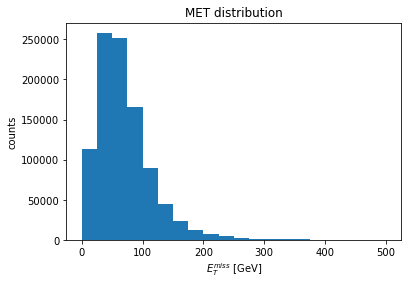

In [6]:
#Take the MET and plot its histogram
MET = events.MET.pt
plt.hist(MET, bins=20, range=[0,500], label="$E_{T}^{miss}$ [GeV]")
plt.xlabel("$E_{T}^{miss}$ [GeV]")
plt.ylabel("counts")
plt.title("MET distribution")
#plt.legend()

#Make histogram
#MET_hist=hist.Hist.new.Reg(20, 0, 500, name="MET", label="$E_{T}^{miss}$ [GeV]")
#Fill and plot histogram
#MET_hist.Double().fill(MET).plot1d()

Text(0.5, 1.0, 'muon $p_{T}$ distribution')

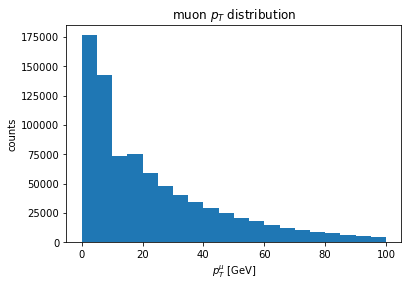

In [7]:
#Take the muon pt and plot its histogram
muonpt = events.Muon.pt
plt.hist(ak.flatten(muonpt), bins=20, range=[0,100], label="$p_{T}^{\mu}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays 
plt.xlabel("$p_{T}^{\mu}$ [GeV]")
plt.ylabel("counts")
plt.title("muon $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'electron $p_{T}$ distribution')

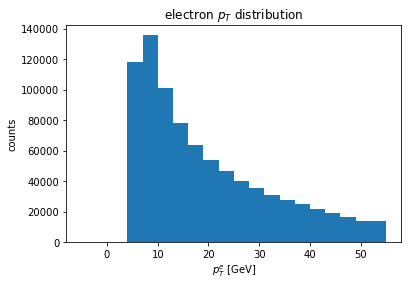

In [8]:
#Take the electron pt and plot its histogram
ept = events.Electron.pt
plt.hist(ak.flatten(ept), bins=20, range=[-5,55], label="$p_{T}^{e}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$p_{T}^{e}$ [GeV]")
plt.ylabel("counts")
plt.title("electron $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'jet $p_{T}$ distribution')

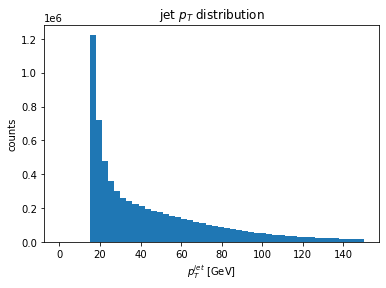

In [9]:
#Take the jet pt and plot its histogram
jpt = events.Jet.pt
plt.hist(ak.flatten(jpt), bins=50, range=[0,150], label="$p_{T}^{jet}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$p_{T}^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("jet $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'jet pseudorapidity distribution')

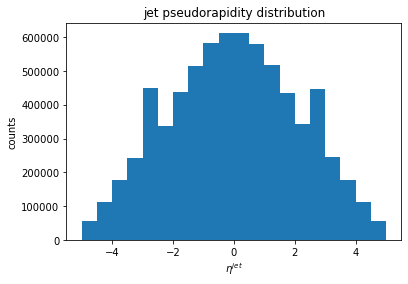

In [10]:
#Take the jet pseudorapidity and plot its histogram
jeta = events.Jet.eta
plt.hist(ak.flatten(jeta), bins=20, range=[-5,5], label="$\eta^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$\eta^{jet}$")
plt.ylabel("counts")
plt.title("jet pseudorapidity distribution")
#plt.legend()

Text(0.5, 1.0, 'jet mass distribution')

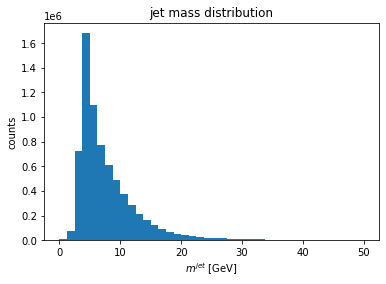

In [11]:
#Take the jet mass and plot its histogram
jm = events.Jet.mass
plt.hist(ak.flatten(jm), bins=40, range=[0,50], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("jet mass distribution")
#plt.legend()

Text(0.5, 1.0, 'genjet $p_{T}$ distribution')

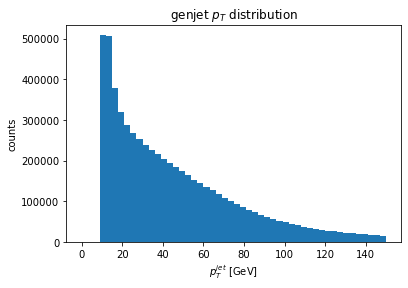

In [12]:
#Take the genjet pt and plot its histogram
gjpt = events.GenJet.pt
plt.hist(ak.flatten(gjpt), bins=50, range=[0,150], label="$p_{T}^{jet}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$p_{T}^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("genjet $p_{T}$ distribution")
#plt.legend()

Text(0.5, 1.0, 'genjet pseudorapidity distribution')

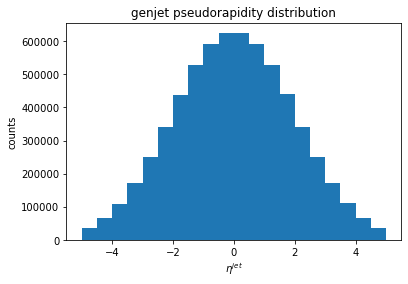

In [13]:
#Take the genjet pseudorapidity and plot its histogram
gjeta = events.GenJet.eta
plt.hist(ak.flatten(gjeta), bins=20, range=[-5,5], label="$\eta^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$\eta^{jet}$")
plt.ylabel("counts")
plt.title("genjet pseudorapidity distribution")
#plt.legend()

Text(0.5, 1.0, 'genjet mass distribution')

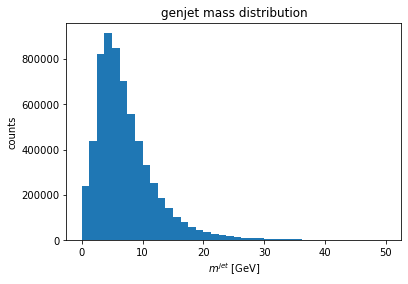

In [14]:
#Take the genjet mass and plot its histogram
gjm = events.GenJet.mass
plt.hist(ak.flatten(gjm), bins=40, range=[0,50], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("genjet mass distribution")
#plt.legend()

Text(0.5, 1.0, 'GenJetAK8 mass distribution')

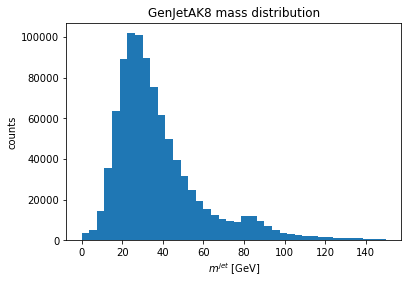

In [15]:
#Take the GenJetAK8 mass and plot its histogram
gjm = events.GenJetAK8.mass
plt.hist(ak.flatten(gjm), bins=40, range=[0,150], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("GenJetAK8 mass distribution")
#plt.legend()

Text(0.5, 1.0, 'fatjet mass distribution')

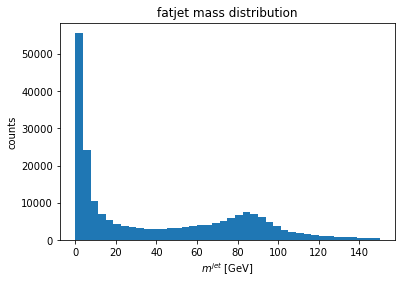

In [16]:
#Take the fatjet mass and plot its histogram
fjm = events.FatJet.msoftdrop
plt.hist(ak.flatten(fjm), bins=40, range=[0,150], label="$m^{j}$ [GeV]")
#previous line: you have to flatten the awkward array because its size is ambiguous due to variable-length arrays
plt.xlabel("$m^{jet}$ [GeV]")
plt.ylabel("counts")
plt.title("fatjet mass distribution")
#plt.legend()

Text(0.5, 1.0, 'VBS dijet pseudorapidity distribution')

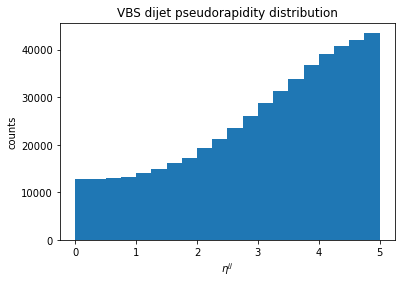

In [17]:
#Take all the jets 
jets = events.Jet
# Get all combinations of jet pairs in every event
dijets = ak.combinations(jets, 2, fields=['i0', 'i1'])
#print(dijets)
#dijets.type

# Check that jet pairs have the greatest mass
ismax=(dijets['i0']+dijets['i1']).mass==ak.max((dijets['i0']+dijets['i1']).mass, axis=1)
#previous line: returns a Boolean array with True where the condition is met, and false otherwise

# Mask the dijets with the ismax to get dijets with the gratest mass
good_dijets = dijets[ismax]

# Separate pairs into arrays of the first and the second jet in each pair.
first_jet, second_jet = ak.unzip(good_dijets)

# Compute difference in pseudorapidity
delta_eta = first_jet.eta - second_jet.eta

# Plot
plt.hist(ak.flatten(abs(delta_eta)), bins=20, range=[0,5], label="$\delta\eta^{jj}$")
plt.xlabel("$\eta^{jj}$")
plt.ylabel("counts")
plt.title("VBS dijet pseudorapidity distribution")
#plt.hist(ak.flatten((first_jet+second_jet).mass), bins=40, range=[0,5000], label="$m^{jj}$ [GeV]")
#plt.xlabel("$m^{jj}$ [GeV]")
#plt.ylabel("counts")
#plt.title("VBS dijet mass distribution")
#plt.legend()

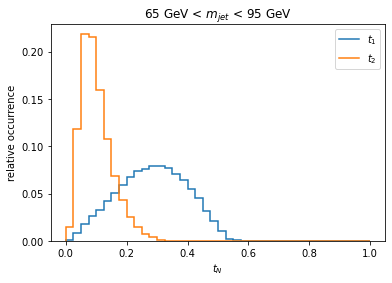

In [18]:
#Take the fatjets
fatjets = events.FatJet
# Get only fatjets with mass between 65 and 95
limits = ((fatjets.mass>65) & (fatjets.mass<95))
#Get the variables of N-subjectiness
good_fatjets=fatjets[limits]
tau_1=good_fatjets.tau1
tau_2=good_fatjets.tau2
#Normalization factors
norm_1 = ak.sum(ak.num(tau_1))
norm_2 = ak.sum(ak.num(tau_2))

#Plot two histograms together
h = hist.Hist(hist.axis.StrCategory(name='channel', label='Channel', categories=['$t_{1}$', '$t_{2}$']), 
                      hist.axis.Regular(name='t', label='tau', bins=40, start= 0, stop=1))

h.fill(channel='$t_{1}$', t=ak.flatten(tau_1), weight=1/norm_1)
h.fill(channel='$t_{2}$', t=ak.flatten(tau_2), weight=1/norm_2)
h.plot()
plt.title("65 GeV < $m_{jet}$ < 95 GeV")
plt.xlabel("$t_{N}$")
plt.ylabel("relative occurrence")
plt.legend()

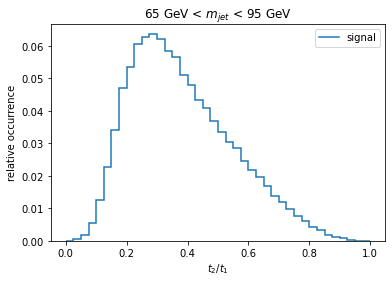

In [19]:
#Take the tau2 to tau1 ratio
tau_r=tau_2/tau_1
#Normalization factor
norm_r = ak.sum(ak.num(tau_r))
#Plot the histogram
h_r = hist.Hist(hist.axis.StrCategory(name='channel', label='Channel', categories=['signal']), 
                      hist.axis.Regular(name='t_r', label='tau', bins=40, start= 0, stop=1))
h_r.fill(channel='signal', t_r=ak.flatten(tau_r), weight=1/norm_r)

h_r.plot()
plt.title("65 GeV < $m_{jet}$ < 95 GeV")
plt.xlabel("$t_{2}/t_{1}$")
plt.ylabel("relative occurrence")
plt.legend()

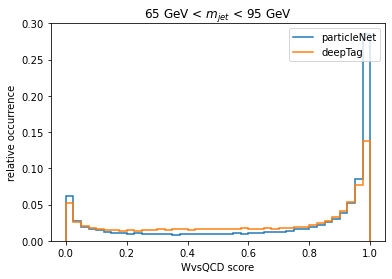

In [20]:
#Take the fatjets
fatjets = events.FatJet
# Get only fatjets with mass between 65 and 95
limits = ((fatjets.mass>65) & (fatjets.mass<95))
#Get the variables of particleNet and deepTag
good_fatjets=fatjets[limits]
pNet=good_fatjets.particleNet_WvsQCD
dTag=good_fatjets.deepTag_WvsQCD
#Normalization factor
norm_pNet = ak.sum(ak.num(pNet))
norm_dTag = ak.sum(ak.num(dTag))

#Plot two histograms together
h = hist.Hist(hist.axis.StrCategory(name='channel', label='Channel', categories=['particleNet', 'deepTag']), 
                      hist.axis.Regular(name='WvsQCD', label='WvsQCD', bins=40, start= 0, stop=1))

h.fill(channel='particleNet', WvsQCD=ak.flatten(pNet), weight=1/norm_pNet)
h.fill(channel='deepTag', WvsQCD=ak.flatten(dTag), weight=1/norm_dTag)
h.plot()
plt.title("65 GeV < $m_{jet}$ < 95 GeV")
plt.xlabel("WvsQCD score")
plt.ylabel("relative occurrence")
plt.legend()